In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor  
from sklearn.utils import shuffle
from matplotlib import style
from IPython.display import display 

# FUNCTIONS
def grad(x, y, w, b):
  m = x.shape[0]
  dw, db = 0, 0
  for i in range(m):
    dw = dw + (w*x[i] + b - y[i]) * x[i]
    db = db + (w*x[i] + b - y[i])
  return (dw/m), (db/m)

def cost(x, y, w, b):
  m = x.shape[0]
  c = 0
  for i in range(m):
    c += (w*x[i] + b - y[i])**2
  return (1 / (2 * m) * c);

def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
  J, W, B = [], [], []
  w, b = w_in, b_in

  for i in range(num_iters):
    dw, db = grad(x, y, w, b)
    w = w - alpha * dw
    b = b - alpha * db
    if i < 1e6:
      J.append(cost(x, y, w, b))
      W.append(w)
      B.append(b)
  return w, b, J, W, B

def line(x, w, b):
  return w*x + b

def display_plot(iter, w, b, x_train, y_train):
  cost_string = cost(x_train, y_train, w, b)

  # Display regression line
  x_val = np.linspace(min(x_train), max(x_train), 2)
  y_val = line(x_val, w, b)
  plt.plot(x_val, y_val, c = "red")

  # Additional info about plot
  plt.scatter(data['Height'], data['Weight'])
  plt.title("Iterations = " + str(iter))
  plt.text(63.5, 238, cost_string, fontsize=12, color="black")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

# Data processing
data = pd.read_csv("weight-height.csv", nrows=50)

x_train = np.array(data['Height'])
y_train = np.array(data['Weight'])

#Feature scaling
scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train.reshape(-1,1)).flatten()
# y_train = scaler.fit_transform(y_train.reshape(-1,1)).flatten()

display(data)
display(x_train)
display(y_train) 


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971111
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


array([73.84701702, 68.78190405, 74.11010539, 71.7309784 , 69.88179586,
       67.25301569, 68.78508125, 68.34851551, 67.01894966, 63.45649398,
       71.19538228, 71.64080512, 64.76632913, 69.2830701 , 69.24373223,
       67.6456197 , 72.41831663, 63.97432572, 69.6400599 , 67.93600485,
       67.91505019, 69.43943987, 66.14913196, 75.20597361, 67.89319634,
       68.1440328 , 69.08963143, 72.80084352, 67.42124228, 68.49641536,
       68.61811055, 74.03380762, 71.52821604, 69.1801611 , 69.57720237,
       70.40092889, 69.07617117, 67.19352328, 65.80731565, 64.30418789,
       67.97433623, 72.18942596, 65.27034552, 66.09017738, 67.51032152,
       70.10478626, 68.25183644, 72.17270912, 69.17985762, 72.87036015])

array([241.8935632, 162.3104725, 212.7408556, 220.0424703, 206.3498006,
       152.2121558, 183.9278886, 167.9711105, 175.9294404, 156.3996764,
       186.6049256, 213.7411695, 167.1274611, 189.4461814, 186.434168 ,
       172.1869301, 196.0285063, 172.8834702, 185.9839576, 182.426648 ,
       174.1159291, 197.7314216, 149.173566 , 228.7617806, 162.0066518,
       192.3439766, 184.4351744, 206.8281894, 175.2139224, 154.3426389,
       187.5068432, 212.9102253, 195.0322432, 205.1836213, 204.1641255,
       192.9035151, 197.4882426, 183.8109732, 163.8518249, 163.1080171,
       172.1355974, 194.0454049, 168.6177462, 161.1934326, 164.6602773,
       188.9223032, 187.0605522, 209.0708634, 192.0143354, 211.3424968])

In [3]:
# Train model using hand written fucntions
iter, w_in, b_in, alpha = 5000, 0, 0, 0.000418
w, b, J, W, B = gradient_descent(x_train, y_train, w_in, b_in, alpha, iter)

In [4]:
sgdr = SGDRegressor(max_iter=iter, eta0=alpha)
sgdr_x_train = x_train.reshape(-1,1)
sgdr.fit(sgdr_x_train, y_train)

SGDRegressor(eta0=0.000418, max_iter=5000)

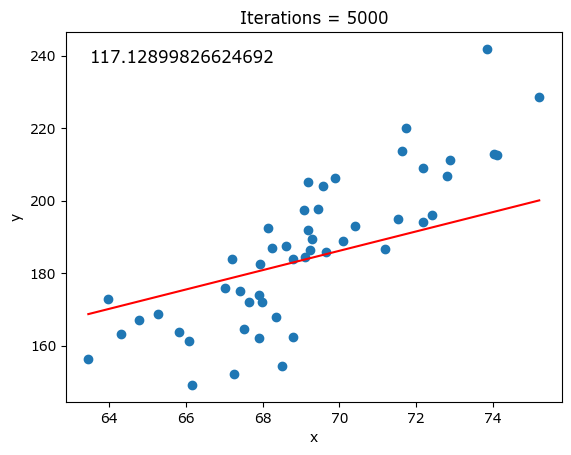

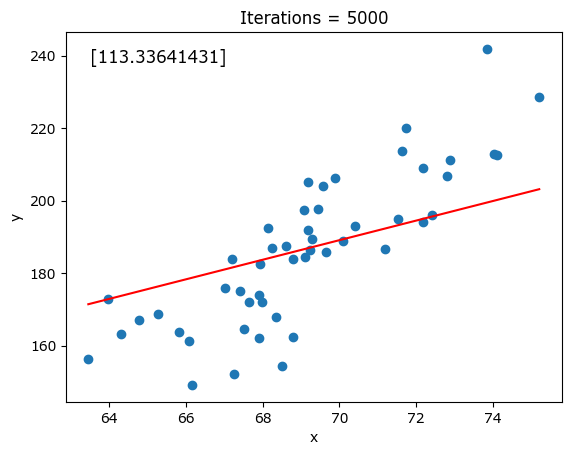

In [5]:
# Display plot 1 of hand-written GD
display_plot(iter, w, b, x_train, y_train)

# Display plot 2 of Scikit Learn's GD
display_plot(iter, sgdr.coef_, sgdr.intercept_, x_train, y_train)

In [6]:
print(sgdr, sgdr.coef_, sgdr.intercept_, sgdr.eta0) # Print attributes of SGDR model

SGDRegressor(eta0=0.000418, max_iter=5000) [2.70172543] [-0.00048889] 0.000418
